In [21]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

In [22]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,5,9,10,11,15,19,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Word clouds from Tweets

Use either sustainable dataset (green) oder general (data) for the variable cloud_data to see the most frequent words 

In [23]:
df = green # or data

In [24]:
df['hashtag_wordcloud'] = np.where(((df['mentioned_hashtags'].isna())|(df['mentioned_hashtags'].str.len() < 3)|(df['mentioned_hashtags'] == "")),"[" "]",df['mentioned_hashtags'])
df['user_mentions_wordcloud'] = np.where(((df['mentioned_usernames'].isna())|(df['mentioned_usernames'].str.len() < 3)|(df['mentioned_usernames'] == "")),"[" "]",df['mentioned_usernames'])
df

,possibly_sensitive,tweets_original,source,lang,created_at,id,author,Branche,Branche-6,Sektor,...,entity_names,mentioned_usernames,mentioned_hashtags,sourcetweet_text,Tweets,year,more_information_provided,green,hashtag_wordcloud,user_mentions_wordcloud
0,False,With #Germany experiencing usually high temper...,Percolate,en,2018-06-09T13:22:03.000Z,1005439886764044290,MunichRe,versicherung,Finance/Insurance,3.0,...,"['Germany', 'ExtremeWeather', 'Eberhard Faust'...",[],"['Germany', 'ExtremeWeather', 'climatechange',...",NaN,With #Germany experiencing usually high temper...,2018.0,True,True,"['Germany', 'ExtremeWeather', 'climatechange',...",[]
1,False,Every minute one garbage truck of plastic is d...,Sprinklr Publishing,en,2018-06-08T10:17:19.000Z,1005031008415223808,Henkel,chemie,Technik,2.0,...,['Henkel'],[],['WorldOceansDay'],NaN,Every minute one garbage truck of plastic is d...,2018.0,True,True,['WorldOceansDay'],[]
2,False,"Can you imagine a world with fewer cars, no tr...",Percolate,en,2018-06-08T08:31:06.000Z,1005004276576354304,MunichRe,versicherung,Finance/Insurance,3.0,...,[],"['Getaround', 'Maureeninno']",['startup'],NaN,"Can you imagine a world with fewer cars, no tr...",2018.0,True,True,['startup'],"['Getaround', 'Maureeninno']"
3,False,RT @TerliWetter: #Klimawandel #Klimakrise ist ...,Twitter Web Client,de,2018-06-07T13:49:30.000Z,1004722015692050433,MunichRe,versicherung,Finance/Insurance,3.0,...,[],"['TerliWetter', 'MunichRe']","['Klimawandel', 'Klimakrise']",NaN,RT @TerliWetter: #Klimawandel #Klimakrise ist ...,2018.0,False,True,"['Klimawandel', 'Klimakrise']","['TerliWetter', 'MunichRe']"
4,False,Driving #sustainability: Henkel Colombia prese...,Sprinklr Publishing,en,2018-06-07T11:17:31.000Z,1004683767934603264,Henkel,chemie,Technik,2.0,...,"['Henkel Colombia', 'RSPOLatAm2018']",['Solidaridadnetw'],"['sustainability', 'RSPOLatAm2018', 'palmoil']",NaN,Driving #sustainability: Henkel Colombia prese...,2018.0,True,True,"['sustainability', 'RSPOLatAm2018', 'palmoil']",['Solidaridadnetw']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22816,False,"At Allianz, #diversity plays an important role...",Twitter Web Client,en,2018-05-23T10:01:22.000Z,999228786485886976,Allianz,versicherung,Finance/Insurance,3.0,...,['Allianz'],[],"['diversity', 'workplace']",NaN,"At Allianz, #diversity plays an important role...",2018.0,True,True,"['diversity', 'workplace']",[]
22817,False,RT @UNEnvironment: Humankind represents just 0...,Twitter Web Client,en,2018-05-23T08:11:05.000Z,999201035448090630,Allianz,versicherung,Finance/Insurance,3.0,...,[],[],[],NaN,RT @UNEnvironment: Humankind represents just 0...,2018.0,True,True,[],[]
22818,False,As a world-leading supplier of high-tech #poly...,Twitter Ads,en,2018-05-23T07:58:00.000Z,999197741057265664,covestro,chemie,Technik,2.0,...,"['SDGs', 'UTECHEurope']",['Utech_PU'],"['polymer', 'SDGs', 'InnovationForSustainableG...",NaN,As a world-leading supplier of high-tech #poly...,2018.0,True,True,"['polymer', 'SDGs', 'InnovationForSustainableG...",['Utech_PU']
22819,False,RT @adidasrunning: There is a new dawn for run...,Twitter Ads,en,2018-05-22T22:20:56.000Z,999052517123108864,adidas,mode,Textil,2.0,...,['SOLARBOOST'],['adidasrunning'],['SOLARBOOST'],There is a new dawn for running. See how #SOLA...,There is a new dawn for running. See how #SOLA...,2018.0,False,True,['SOLARBOOST'],['adidasrunning']


In [25]:
df['hashtag_wordcloud'] = df['hashtag_wordcloud'].astype(str).apply(lambda x: " ".join(eval(x)))
df['user_mentions_wordcloud'] = df['user_mentions_wordcloud'].astype(str).apply(lambda x: " ".join(eval(x)))
df

,possibly_sensitive,tweets_original,source,lang,created_at,id,author,Branche,Branche-6,Sektor,...,entity_names,mentioned_usernames,mentioned_hashtags,sourcetweet_text,Tweets,year,more_information_provided,green,hashtag_wordcloud,user_mentions_wordcloud
0,False,With #Germany experiencing usually high temper...,Percolate,en,2018-06-09T13:22:03.000Z,1005439886764044290,MunichRe,versicherung,Finance/Insurance,3.0,...,"['Germany', 'ExtremeWeather', 'Eberhard Faust'...",[],"['Germany', 'ExtremeWeather', 'climatechange',...",NaN,With #Germany experiencing usually high temper...,2018.0,True,True,Germany ExtremeWeather climatechange natcat2018,
1,False,Every minute one garbage truck of plastic is d...,Sprinklr Publishing,en,2018-06-08T10:17:19.000Z,1005031008415223808,Henkel,chemie,Technik,2.0,...,['Henkel'],[],['WorldOceansDay'],NaN,Every minute one garbage truck of plastic is d...,2018.0,True,True,WorldOceansDay,
2,False,"Can you imagine a world with fewer cars, no tr...",Percolate,en,2018-06-08T08:31:06.000Z,1005004276576354304,MunichRe,versicherung,Finance/Insurance,3.0,...,[],"['Getaround', 'Maureeninno']",['startup'],NaN,"Can you imagine a world with fewer cars, no tr...",2018.0,True,True,startup,Getaround Maureeninno
3,False,RT @TerliWetter: #Klimawandel #Klimakrise ist ...,Twitter Web Client,de,2018-06-07T13:49:30.000Z,1004722015692050433,MunichRe,versicherung,Finance/Insurance,3.0,...,[],"['TerliWetter', 'MunichRe']","['Klimawandel', 'Klimakrise']",NaN,RT @TerliWetter: #Klimawandel #Klimakrise ist ...,2018.0,False,True,Klimawandel Klimakrise,TerliWetter MunichRe
4,False,Driving #sustainability: Henkel Colombia prese...,Sprinklr Publishing,en,2018-06-07T11:17:31.000Z,1004683767934603264,Henkel,chemie,Technik,2.0,...,"['Henkel Colombia', 'RSPOLatAm2018']",['Solidaridadnetw'],"['sustainability', 'RSPOLatAm2018', 'palmoil']",NaN,Driving #sustainability: Henkel Colombia prese...,2018.0,True,True,sustainability RSPOLatAm2018 palmoil,Solidaridadnetw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22816,False,"At Allianz, #diversity plays an important role...",Twitter Web Client,en,2018-05-23T10:01:22.000Z,999228786485886976,Allianz,versicherung,Finance/Insurance,3.0,...,['Allianz'],[],"['diversity', 'workplace']",NaN,"At Allianz, #diversity plays an important role...",2018.0,True,True,diversity workplace,
22817,False,RT @UNEnvironment: Humankind represents just 0...,Twitter Web Client,en,2018-05-23T08:11:05.000Z,999201035448090630,Allianz,versicherung,Finance/Insurance,3.0,...,[],[],[],NaN,RT @UNEnvironment: Humankind represents just 0...,2018.0,True,True,,
22818,False,As a world-leading supplier of high-tech #poly...,Twitter Ads,en,2018-05-23T07:58:00.000Z,999197741057265664,covestro,chemie,Technik,2.0,...,"['SDGs', 'UTECHEurope']",['Utech_PU'],"['polymer', 'SDGs', 'InnovationForSustainableG...",NaN,As a world-leading supplier of high-tech #poly...,2018.0,True,True,polymer SDGs InnovationForSustainableGrowth su...,Utech_PU
22819,False,RT @adidasrunning: There is a new dawn for run...,Twitter Ads,en,2018-05-22T22:20:56.000Z,999052517123108864,adidas,mode,Textil,2.0,...,['SOLARBOOST'],['adidasrunning'],['SOLARBOOST'],There is a new dawn for running. See how #SOLA...,There is a new dawn for running. See how #SOLA...,2018.0,False,True,SOLARBOOST,adidasrunning


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/theakramer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


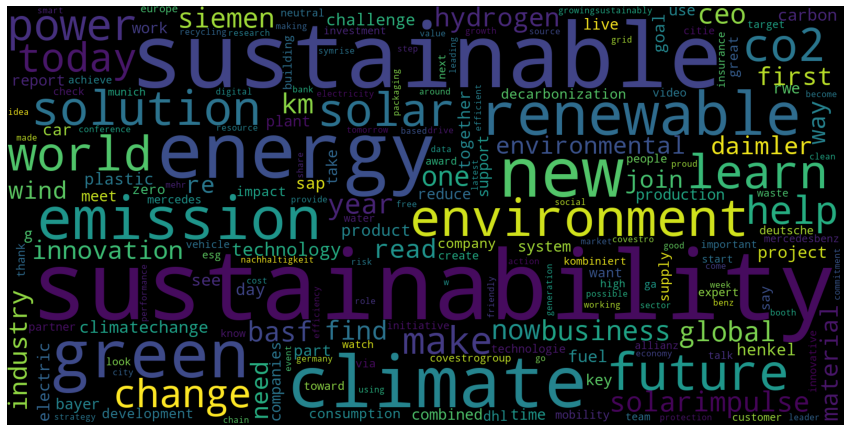

In [27]:
import nltk 
nltk.download('stopwords')

cloud_data = df
cloud_column = 'Tweets' #change to 'Tweets' or 'hashtag_wordcloud' or 'user_mentions_wordcloud'

cloud_data[cloud_column] = cloud_data[cloud_column].astype(str)
cloud_data[cloud_column] = [entry.lower() for entry in cloud_data[cloud_column]]
text = ' '.join(cloud_data[cloud_column])
stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')
wordcloud = WordCloud(width=1600, height=800, stopwords = stop_words, collocations=False).generate(str(text))

plt.figure( figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

change df variable to either sustainable dataset (green) oder general (data) to see the most frequent words per company

ValueError: We need at least 1 word to plot a word cloud, got 0.

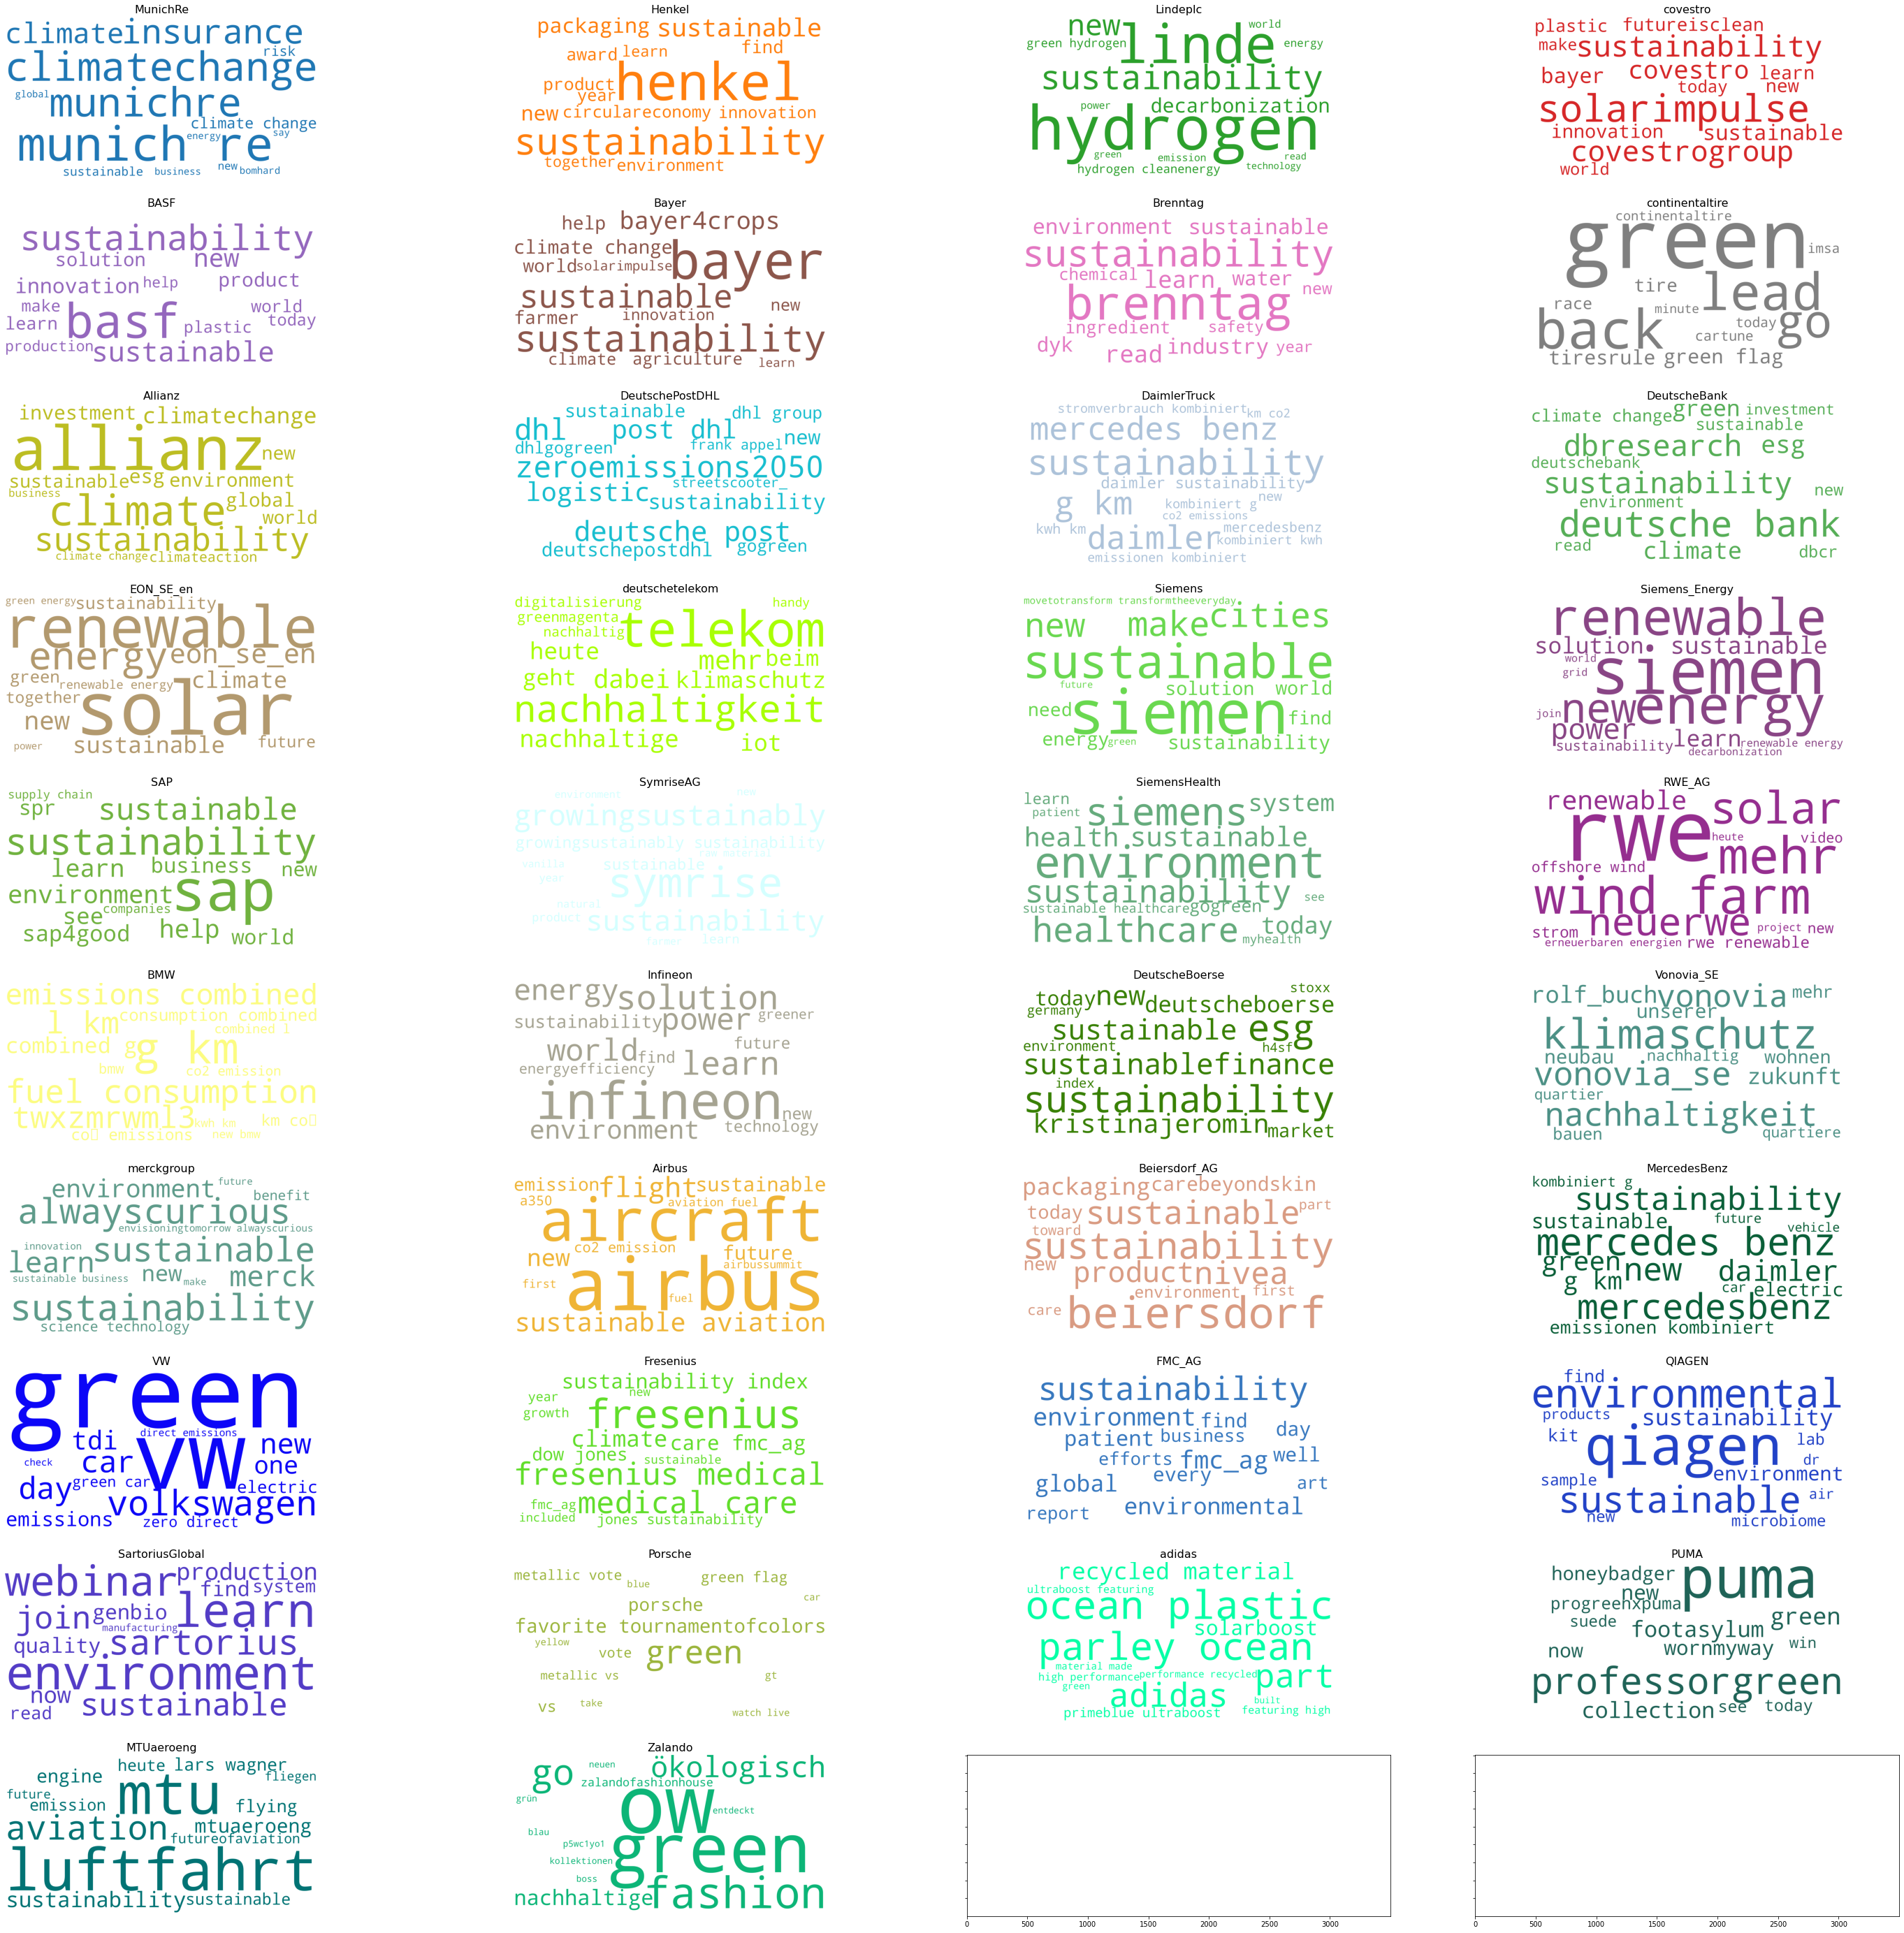

In [28]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

df = cloud_data #change to either green or data

stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] + [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=1800,
                  max_words=14,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(10, 4, figsize=(50,50), sharex=True, sharey=True)
companies = df['author'].unique().tolist()
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    comp_data = df
    comp_data = comp_data[comp_data['author'] == companies[i]]
    #cloud_data['Tweets_lower'] = [entry.lower() for entry in cloud_data[cloud_column]]
    text = ' '.join(comp_data[cloud_column])

    cloud.generate(str(text))
    plt.gca().imshow(cloud)
    plt.gca().set_title(str(companies[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.figure(figsize=(9, 3.5), dpi=1600)
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
'''plt.savefig("wordclouds", 
                          dpi=3600,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)'''